<a href="https://colab.research.google.com/github/Aditi-AI-11/Credit-Card-Risk-Protection/blob/main/Credit_Approval_Risk_Protection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: The importance of this project lies in the fact that predicting good clients is crucial for banks to minimize risks and maximize profits. Accurate credit card approval prediction can help banks identify high-risk applicants and make informed decisions. This project can have a significant impact on the banking sector by reducing the number of bad loans and improving the overall creditworthiness of customers.

There is a gap in the knowledge of using machine learning models to predict credit card approval in the Indian banking sector. This project aims to fill this gap by developing a predictive model that can be used by banks in India to improve their credit card approval process.



Section 2: Based on the questions above, the initial hypothesis is that:

1. Annual income, and employment status are strong predictors of credit card approval.
2. Machine learning models can be used to identify patterns in customer data that are indicative of creditworthiness.
3. The proposed model will be able to predict credit card approval with an accuracy of at least 80%.



Section 3: Data Analysis Approach
1. Data cleaning and preprocessing: The Credit_Card.csv and Credit_card_label.csv datasets will be cleaned and preprocessed to remove missing values and handle outliers.
2. Exploratory Data Analysis (EDA): EDA techniques will be used to identify patterns and relationships in the data.
3. Feature engineering: Relevant feature engineering techniques will be applied to extract meaningful features from the data.
4. Data visualization: Data visualization techniques will be used to visualize the results of the EDA and feature engineering steps.

The EDA approach will be used to identify important patterns in the data, including:

1. Correlation between annual income and credit card approval
2. Relationship between employment status and credit card approval



Section 4: Machine Learning Approach

1. Model selection: Multiple machine learning models, including logistic regression, decision trees, random forests, and neural networks, will be selected and trained on the dataset.
2. Model evaluation: The performance of each model will be evaluated using metrics such as accuracy, precision, recall, and F1-score.
3. Model comparison: The performance of each model will be compared, and the best-performing model will be selected.
4. Hyperparameter tuning: Hyperparameter tuning will be performed to improve the accuracy of the selected model.

The most appropriate model will be justified based on the performance metrics and cost functions.











In [ ]:
#Loading both the banking datasets
import pandas as pd
import numpy as np
# Load the datasets
df2 = pd.read_csv("/content/Credit_card_label.csv")

In [ ]:
df1.head(20)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3


In [ ]:
df2.head(5)

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
#Merging the 2 dataset with outerjoin, because we need all the values.
m_df = df1.merge(df2, how = "outer", on = "Ind_ID")


In [ ]:
m_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [ ]:
#Exploring the data.
#Here, we will first find out the column's datatype, if they have null values, and the column names.
#We will also find how many rows and columns are there in the entire dataset.
m_df.shape

(1548, 19)

In [ ]:
m_df.info()
#The columns that have null values are - GENDER, Annual_income, Birthday_count, and Type_Occupation.
#The column whose datatype needs to be changed - Annual_income, Birthday_count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
#Continuous variables - CHILDREN, Annual_income, Birthday_count, Employed_days, Family_Members.
#Discrete variables - Ind_ID, GENDER, Car_Owner, Propert_Owner, Type_Income, EDUCATION, Marital_status,Housing_type, Mobile_phone, Work_Phone,
#Phone, EMAIL_ID, Type_Occupation, Label.

In [ ]:
#1. We will find out whether the dataset has null values. (Dropping the column that has more than 30% of the values missing.)
#2. We will then either replace the missing values with mean, median, or mode.
#3. We will replace the wrong data with mean, median, or mode.
#4. We will change the datatypes for certain columns.
#5. We will then  work on outliers.
#6. We will then convert categorical data to quantitative data.

In [ ]:
m_df.isnull().sum()/len(m_df)*100
#We will drop the Type_Occupation column, since more than 30% of the value is missing.

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

In [ ]:
m_df = m_df.drop(columns = ["Type_Occupation"])

In [ ]:
m_df.shape

(1548, 18)

In [ ]:
#"GENDER" column is categorical, we will replace the missing value by using mode.
#"Annual_income" is quantitative, we will replace it by using mean or median. (First, we will check for outliers.)
#"Birthday_count" is quantitaive, we will replace it with using mean or median. (First, we will check for outliers.)


In [ ]:
m_df["GENDER"].mode()

0    F
Name: GENDER, dtype: object

In [ ]:
m_df["GENDER"]=m_df["GENDER"].fillna(m_df["GENDER"].mode()[0])

In [ ]:
m_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,2,0


In [ ]:
#Handling missing values for continuous variable
import plotly.express as px
fig = px.histogram(m_df, x="Annual_income", width = 800, height = 400,
                   labels = {"Annual_income": "Annual Income", "count":"Frequency"})
fig.update_layout(showlegend = True)
fig.show()

#The data is slightly right skewed. Atleast 15-16 applicants earn above 5 lakh annually, while most of the applicants earn below it.
#So, we will replace the misisng values with median. And handle the outliers after this step.

In [ ]:
m_df["Annual_income"]=m_df["Annual_income"].fillna(m_df["Annual_income"].median())


In [ ]:
import plotly.express as px
fig = px.histogram(m_df, x="Birthday_count", width = 800, height = 400,
                   labels ={"Birthday_count": "Birthday count"})
fig.update_layout(showlegend = True)
fig.show()
#Most of the data is evenly distributed, we will go with mean, for the missing values.

In [ ]:
m_df["Birthday_count"]=m_df["Birthday_count"].fillna(m_df["Birthday_count"].mean())

In [ ]:
#Rechecking for missing values
m_df.isnull().sum()

NameError: name 'm_df' is not defined

In [ ]:
#Converting datatypes for "Annual_income", and "Birthday_count" from float to int type.
m_df["Annual_income"]=m_df["Annual_income"].astype(int)
m_df["Birthday_count"]=m_df["Birthday_count"].astype(int)

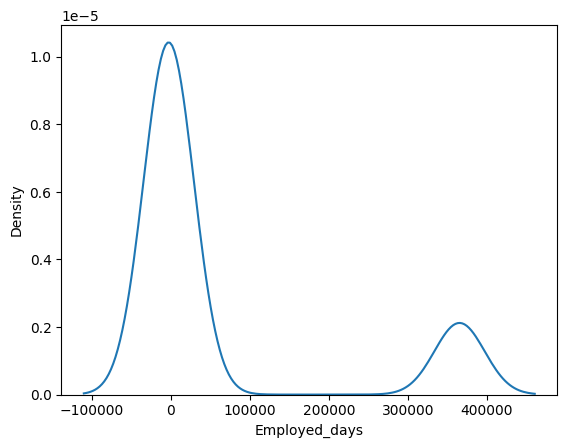

In [ ]:
import seaborn as sns
sns.kdeplot(m_df["Employed_days"])

fig = px.histogram(m_df, x= "Employed_days", nbins = 20, width = 800, height = 400,
                   labels ={"Employed_days": "Number of days employed"})
fig.update_layout(showlegend = True)
fig.show()


In [ ]:
m_df["Employed_days"].skew()

1.770964333419757

In [ ]:
m_df["Employed_days"].describe()

count      1548.000000
mean      59364.689922
std      137808.062701
min      -14887.000000
25%       -3174.500000
50%       -1565.000000
75%        -431.750000
max      365243.000000
Name: Employed_days, dtype: float64

In [ ]:
Q1 = m_df['Employed_days'].quantile(0.25)
Q3 = m_df['Employed_days'].quantile(0.75)
IQR = Q3 - Q1

outliers = m_df[(m_df['Employed_days'] < Q1 - 1.5 * IQR) | (m_df['Employed_days'] > Q3 + 1.5 * IQR)]

print(outliers)

       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0         180000   
7     5009894      F         N             N         0         180000   
26    5024916      F         N             Y         0         112500   
27    5024917      F         N             Y         0         166500   
31    5029311      F         N             Y         0         112500   
...       ...    ...       ...           ...       ...            ...   
1509  5024077      F         Y             Y         0         157500   
1511  5053535      F         N             Y         0         216000   
1514  5051097      F         N             N         0          69750   
1525  5023719      F         Y             Y         0         175500   
1531  5048642      F         N             N         0         157500   

     Type_Income                      EDUCATION        Marital_status  \
0      Pensioner               Higher education   

In [ ]:
Q1 = m_df['Employed_days'].quantile(0.25)
Q3 = m_df['Employed_days'].quantile(0.75)
IQR = Q3 - Q1

m_df["Employed_days"] = m_df["Employed_days"].clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR)

In [ ]:
#Checking if the outliers have been replaced.
outliers = m_df[(m_df['Employed_days'] < Q1 - 1.5 * IQR) | (m_df['Employed_days'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Birthday_count, Employed_days, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Family_Members, label]
Index: []


In [ ]:
#Converting categorical variable to continuous variable.
m_df['GENDER'] = m_df['GENDER'].map({'M': 0, 'F': 1})

In [ ]:
m_df['Car_Owner'] = m_df['Car_Owner'].map({'Y': 1, 'N': 0})

In [ ]:
m_df['Propert_Owner'] = m_df['Propert_Owner'].map({'Y': 1, 'N': 0})

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
m_df['Type_Income'] = le.fit_transform(m_df['Type_Income'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
m_df['EDUCATION'] = le.fit_transform(m_df['EDUCATION'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
m_df['Marital_status'] = le.fit_transform(m_df['Marital_status'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
m_df['Housing_type'] = le.fit_transform(m_df['Housing_type'])

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Creating X and Y variables
X = m_df.iloc[:, 0:17]  # select all rows, and columns 0 to 18 (17 columns)
Y = m_df.iloc[:, 17]  # select all rows, and column 17 (target variable)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310

Confusion Matrix:
[[280   0]
 [ 30   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Since the model is predicted with 90% accuracy, it means that the model will predict correctly 90% of the time. And 10% of the time, it will predict the wrong outcome.
